In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('dataset.csv', sep = ';', usecols=[1,2])

In [35]:
df['VALUE_DAY'] = pd.to_datetime(df.VALUE_DAY, format='%d.%m.%Y')

In [36]:
#проставляю когорты и месяц с момента первой активности
df['cohorts'] = df.groupby('CLIENT_ID')['VALUE_DAY'].transform('min')

def diff_month(x):
    d1 = x['VALUE_DAY']
    d2 = x["cohorts"]
    return ((d1.year - d2.year) * 12 + d1.month - d2.month)

df['cohort_idx'] = df.apply(lambda x: diff_month(x), axis=1)

In [51]:
#считаю ретеншн
cd = df.groupby(['cohorts', 'cohort_idx'])['CLIENT_ID'].apply(pd.Series.nunique).reset_index()
cc = cd.pivot_table(index = 'cohorts',
                        columns = 'cohort_idx',
                        values = 'CLIENT_ID')
cs = cc.iloc[:,0]
retention = cc.divide(cs, axis = 0)
retention = retention.round(3) * 100

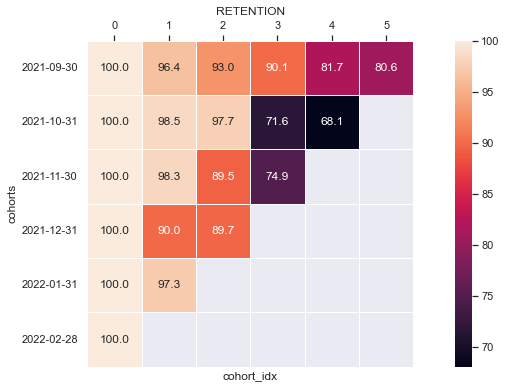

In [79]:
sns.set_theme()
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(retention, annot=True, fmt=".1f", linewidths=.5, ax=ax, square=True)
ax.set_yticklabels(retention.index.strftime('%Y-%m-%d'))
ax.set_title('RETENTION')
ax.xaxis.tick_top()